###Installing pycryptodome

In [2]:
pip install pycryptodome

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 18.1 MB/s eta 0:00:00


###Objective I

In [41]:
import secrets
import time
import hashlib
from Crypto.PublicKey import DSA
from Crypto.Signature import DSS
from Crypto.Hash import SHA256

#creation of keys
def GenerateKey(key_length):
    skey = [[0] * key_length for _ in range(2)] #containing two sublists 256 '1' and '0'
    pkey = [[0] * key_length for _ in range(2)]
    #generation secret key
    for i in range(len(skey)):
        for j in range(len(skey[i])):
            skey[i][j] = bin(secrets.randbits(key_length))[2:] #remove '0b' thingy



    #generation public key
    for i in range(len(pkey)):
        for j in range(len(pkey[i])):
          pkey[i][j] = bin(int(hashlib.sha256(skey[i][j].encode()).hexdigest(), 16))


    keypair = [skey, pkey]
    return keypair

def Sign(m, private_key):
    l=len(private_key[0])
    #print(l)#<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<look here
    mesgh = int(hashlib.sha256(m.encode()).hexdigest(), 16)
    mesgh = bin(mesgh)[2:]
    sign = []
    for j, i in enumerate(mesgh):
      j=int(j)
      i=int(i)
      sign.append(private_key[i][j])
    return sign


def Verify(m,public_key, signature):#verification(message, pkey, signature):
    mhash = int(hashlib.sha256(m.encode()).hexdigest(), 16)
    mhash = bin(mhash)[2:] #remove '0b' thingy
    for i in range(len(signature)):

        j=int(mhash[i]) #take Bits fromright to left
        verify = bin(int(hashlib.sha256(str(signature[i]).encode()).hexdigest(), 16))
        if public_key[j][i] != verify:
            return False
    return True

Objective II

In [42]:
####################################Lamport Test####################################
l=256
#----------------#----------------1KB File----------------#----------------#
with open('1KB_file (1).txt', 'r') as file:
    text1kb = file.read()

start = time.time()
keypair1kb = GenerateKey(l)
tkeyGenLamport1kb = time.time()-start

start = time.time()
signature1kb = Sign(text1kb, keypair1kb[0])
tSign1KbLamport = time.time()-start

start = time.time()
verif1kb = Verify(text1kb, keypair1kb[1], signature1kb)
tVerify1KbLamport = time.time()-start

#----------------#----------------5KB File----------------#----------------#
with open('5KB_file (1).txt', 'r') as file:
    text5kb = file.read()

start = time.time()
keypair5kb = GenerateKey(l)
tkeyGenLamport5kb = time.time()-start

start = time.time()
signature5kb = Sign(text5kb, keypair5kb[0])
tSign5KbLamport = time.time()-start

start = time.time()
verif5kb = Verify(text5kb, keypair5kb[1], signature5kb)
tVerify5KbLamport = time.time()-start

#----------------#----------------10KB File----------------#----------------#
with open('10KB_file (1).txt', 'r') as file:
    text10kb = file.read()

start = time.time()
keypair10kb = GenerateKey(l)
tkeyGenLamport10kb = time.time()-start

start = time.time()
signature10kb = Sign(text10kb, keypair10kb[0])
tSign10KbLamport = time.time()-start

start = time.time()
verif10kb = Verify(text10kb, keypair10kb[1], signature10kb)
tVerify10KbLamport = time.time()-start

#----------------#----------------100KB File----------------#----------------#
with open('100KB_file (1).txt', 'r') as file:
    text100kb = file.read()

start = time.time()
keypair100kb = GenerateKey(l)
tkeyGenLamport100kb = time.time()-start

start = time.time()
signature100kb = Sign(text100kb, keypair100kb[0])
tSign100KbLamport = time.time()-start

start = time.time()
verif100kb = Verify(text100kb, keypair100kb[1], signature100kb)
tVerify100KbLamport = time.time()-start

####################################DSA Test####################################

#----------------#----------------1KB File----------------#----------------#
with open('1KB_file (1).txt', 'rb') as file:
    messeage1kb = file.read()
# Key generation
start_time = time.time()
key1kb = DSA.generate(2048)
keygenDSA1kb= time.time() - start_time

start_time = time.time()
hasher1kb = SHA256.new(messeage1kb)
signer1kb = DSS.new(key1kb, 'fips-186-3')
signature1kb = signer1kb.sign(hasher1kb)
sign_time1kb = time.time() - start_time

start_time = time.time()
verifier1kb = DSS.new(key1kb.publickey(), 'fips-186-3')
verifier1kb.verify(hasher1kb, signature1kb)
verify_time1kb = time.time() - start_time
#----------------#----------------5KB File----------------#----------------#
with open('5KB_file (1).txt', 'rb') as file:
    messeage5kb = file.read()
# Key generation
start_time = time.time()
key5kb = DSA.generate(2048)
keygenDSA5kb= time.time() - start_time

start_time = time.time()
hasher5kb = SHA256.new(messeage5kb)
signer5kb = DSS.new(key5kb, 'fips-186-3')
signature5kb = signer5kb.sign(hasher5kb)
sign_time5kb = time.time() - start_time

start_time = time.time()
verifier5kb = DSS.new(key5kb.publickey(), 'fips-186-3')
verifier5kb.verify(hasher5kb, signature5kb)
verify_time5kb = time.time() - start_time
#----------------#----------------10KB File----------------#----------------#
with open('10KB_file (1).txt', 'rb') as file:
    messeage10kb = file.read()
# Key generation
start_time = time.time()
key10kb = DSA.generate(2048)
keygenDSA10kb= time.time() - start_time

start_time = time.time()
hasher10kb = SHA256.new(messeage10kb)
signer10kb = DSS.new(key10kb, 'fips-186-3')
signature10kb = signer10kb.sign(hasher10kb)
sign_time10kb = time.time() - start_time

start_time = time.time()
verifier10kb = DSS.new(key10kb.publickey(), 'fips-186-3')
verifier10kb.verify(hasher10kb, signature10kb)
verify_time10kb = time.time() - start_time
#----------------#----------------100KB File----------------#----------------#
with open('100KB_file (1).txt', 'rb') as file:
    messeage100kb = file.read()
# Key generation
start_time = time.time()
key100kb = DSA.generate(2048)
keygenDSA100kb= time.time() - start_time

start_time = time.time()
hasher100kb = SHA256.new(messeage100kb)
signer100kb = DSS.new(key100kb, 'fips-186-3')
signature100kb = signer100kb.sign(hasher100kb)
sign_time100kb = time.time() - start_time

start_time = time.time()
verifier100kb = DSS.new(key100kb.publickey(), 'fips-186-3')
verifier100kb.verify(hasher100kb, signature100kb)
verify_time100kb = time.time() - start_time

print("The 1KB was","successfully"if verif1kb else "not","signed and verified using Lamport")
print("The 5KB was","successfully"if verif5kb else "not","signed and verified using Lamport")
print("The 10KB was","successfully"if verif10kb else "not","signed and verified using Lamport")
print("The 100KB was","successfully"if verif100kb else "not","signed and verified using Lamport")

The 1KB was successfully signed and verified using Lamport
The 5KB was successfully signed and verified using Lamport
The 10KB was successfully signed and verified using Lamport
The 100KB was successfully signed and verified using Lamport


In [43]:
############################-------------------RESULTS-------------------############################
print("Key Generation Time for 1kb, 5kb, 10kb, 100kb files respectively in Lamport is:",tkeyGenLamport1kb,"-",tkeyGenLamport5kb,"-",tkeyGenLamport10kb,"-",tkeyGenLamport100kb)
print("Key Generation Time for 1kb, 5kb, 10kb, 100kb files respectively in DSA is:",keygenDSA1kb,"-",keygenDSA5kb,"-",keygenDSA10kb,"-",keygenDSA100kb)
print("_______________________________________________________________________________________________________________________")
print("Signing for 1kb, 5kb, 10kb, 100kb files respectively in Lamport is:",tSign1KbLamport,"-",tSign5KbLamport,"-",tSign10KbLamport,"-",tSign100KbLamport)
print("Signing Time for 1kb, 5kb, 10kb, 100kb files respectively in DSA is:",sign_time1kb,"-",sign_time5kb,"-",sign_time10kb,"-",sign_time100kb)
print("_______________________________________________________________________________________________________________________")
print("Signing for 1kb, 5kb, 10kb, 100kb files respectively in Lamport is:",tVerify1KbLamport,"-",tVerify5KbLamport,"-",tVerify10KbLamport,"-",tVerify100KbLamport)
print("Verifying Time for 1kb, 5kb, 10kb, 100kb files respectively in DSA is:",verify_time1kb,"-",verify_time5kb,"-",verify_time10kb,"-",verify_time100kb)
print("_______________________________________________________________________________________________________________________")

Key Generation Time for 1kb, 5kb, 10kb, 100kb files respectively in Lamport is: 0.005529880523681641 - 0.005020856857299805 - 0.005400180816650391 - 0.005086421966552734
Key Generation Time for 1kb, 5kb, 10kb, 100kb files respectively in DSA is: 7.994819402694702 - 0.9519217014312744 - 8.300940036773682 - 1.3925285339355469
_______________________________________________________________________________________________________________________
Signing for 1kb, 5kb, 10kb, 100kb files respectively in Lamport is: 0.0003886222839355469 - 0.00039577484130859375 - 0.0004544258117675781 - 0.001458883285522461
Signing Time for 1kb, 5kb, 10kb, 100kb files respectively in DSA is: 0.0013735294342041016 - 0.001382589340209961 - 0.0014524459838867188 - 0.001928567886352539
_______________________________________________________________________________________________________________________
Signing for 1kb, 5kb, 10kb, 100kb files respectively in Lamport is: 0.0017254352569580078 - 0.00206208229064941

###Visualizing Data

([0, 1, 2, 3],
 [Text(0, 0, '1KB'),
  Text(1, 0, '5KB'),
  Text(2, 0, '10KB'),
  Text(3, 0, '100KB')])

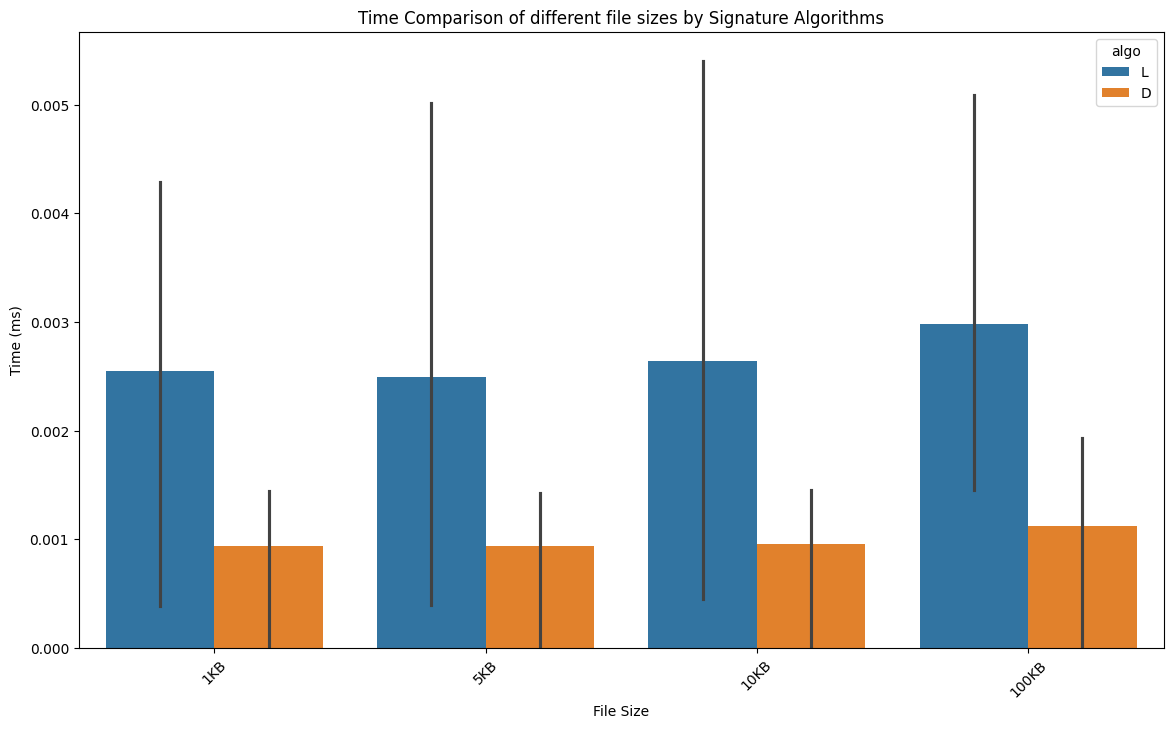

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


data = {
    'algo': ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],
    'sz': ['1KB', '1KB', '1KB', '5KB', '5KB', '5KB', '10KB', '10KB', '10KB', '100KB', '100KB', '100KB', '1KB', '1KB', '1KB', '5KB', '5KB', '5KB', '10KB', '10KB', '10KB', '100KB', '100KB', '100KB'],
    'op': ['Key Generation', 'Signing', 'Verification'] * 8,
    't': [tkeyGenLamport1kb,tSign1KbLamport,tVerify1KbLamport,tkeyGenLamport5kb,tSign5KbLamport,tVerify5KbLamport,tkeyGenLamport10kb,tSign10KbLamport,tVerify10KbLamport,tkeyGenLamport100kb,tSign100KbLamport,tVerify100KbLamport,
          0,sign_time1kb,verify_time1kb,0,sign_time5kb,verify_time5kb,0,sign_time10kb,verify_time10kb,0,sign_time100kb,verify_time100kb]
}
#data = {    'algo': ['L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'L', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D', 'D'],'sz': ['1KB', '1KB', '1KB', '5KB', '5KB', '5KB', '10KB', '10KB', '10KB', '100KB', '100KB', '100KB', '1KB', '1KB', '1KB', '5KB', '5KB', '5KB', '10KB', '10KB', '10KB', '100KB', '100KB', '100KB'],'op': ['Key Generation', 'Signing', 'Verification'] * 8,'t': [tkeyGenLamport1kb,tSign1KbLamport,tVerify1KbLamport,tkeyGenLamport5kb,tSign5KbLamport,tVerify5KbLamport,tkeyGenLamport10kb,tSign10KbLamport,tVerify10KbLamport,tkeyGenLamport100kb,tSign100KbLamport,tVerify100KbLamport,keygenDSA1kb,sign_time1kb,verify_time1kb,keygenDSA5kb,sign_time5kb,verify_time5kb,keygenDSA10kb,sign_time10kb,verify_time10kb,keygenDSA100kb,sign_time100kb,verify_time100kb]}


df = pd.DataFrame(data)

plt.figure(figsize=(14, 8))


sns.barplot(x='sz', y='t', hue='algo',data=df) #data=df[df['algo']=='D'])


plt.title('Time Comparison of different file sizes by Signature Algorithms')
plt.xlabel('File Size')
plt.ylabel('Time (ms)')
plt.xticks(rotation=45)


([0, 1, 2],
 [Text(0, 0, 'Key Generation'),
  Text(1, 0, 'Signing'),
  Text(2, 0, 'Verification')])

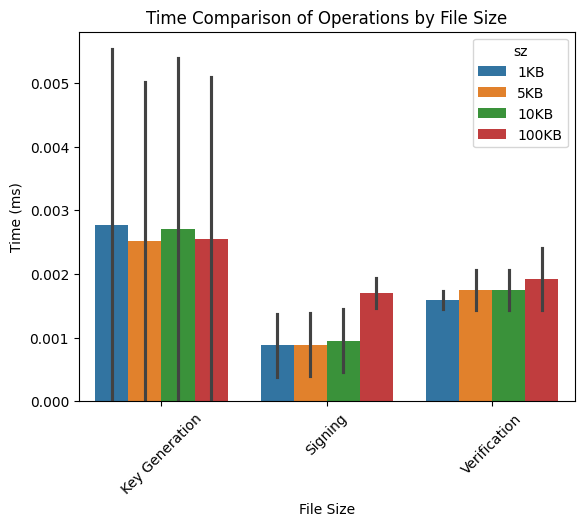

In [52]:

sns.barplot(x='op', y='t', hue='sz',data=df) #data=df[df['algo']=='D'])


plt.title('Time Comparison of Operations by File Size')
plt.xlabel('File Size')
plt.ylabel('Time (ms)')
plt.xticks(rotation=45)



([0, 1, 2],
 [Text(0, 0, 'Key Generation'),
  Text(1, 0, 'Signing'),
  Text(2, 0, 'Verification')])

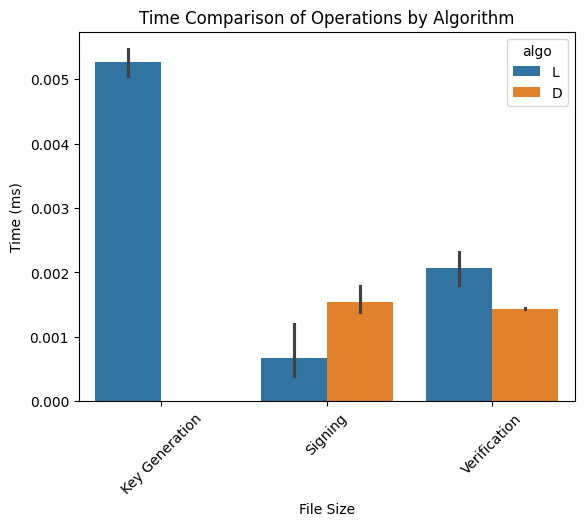

In [53]:
sns.barplot(x='op', y='t', hue='algo',data=df) #data=df[df['algo']=='D'])


plt.title('Time Comparison of Operations by Algorithm')
plt.xlabel('File Size')
plt.ylabel('Time (ms)')
plt.xticks(rotation=45)



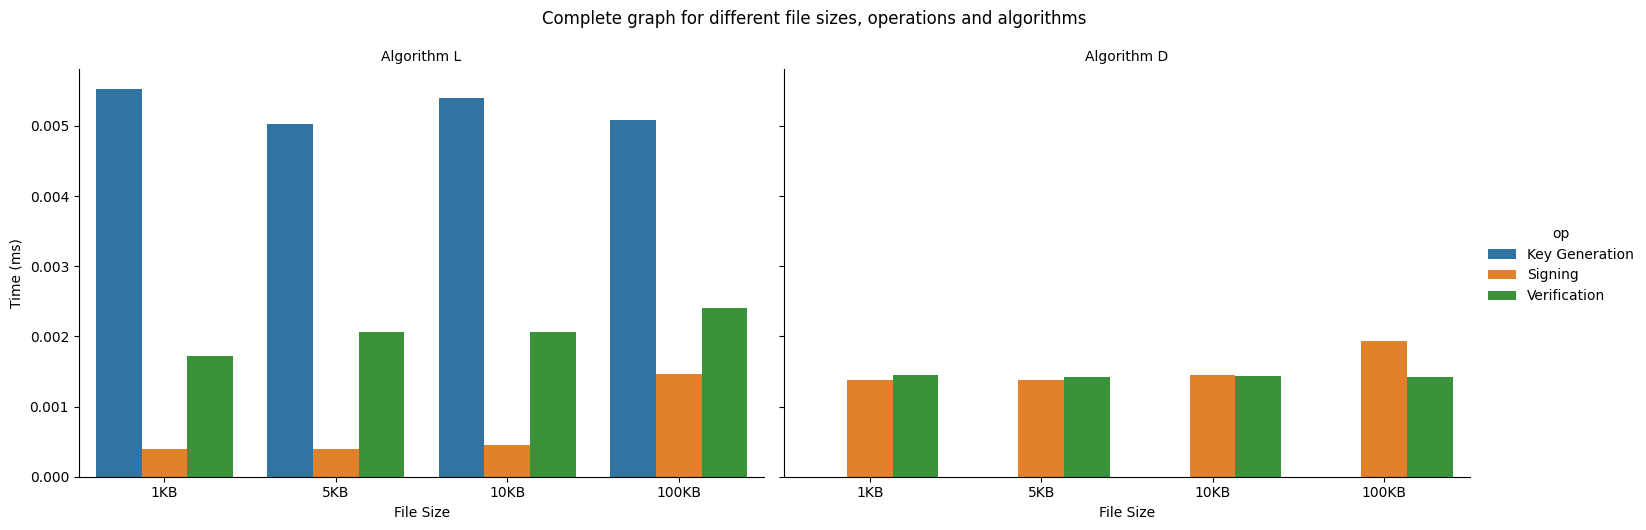

In [59]:
# Separate plots for each algorithm
g = sns.catplot(x='sz', y='t', hue='op', col='algo', data=df, kind='bar', height=5, aspect=1.5)
g.fig.suptitle('Complete graph for different file sizes, operations and algorithms', y=1.05)
g.set_axis_labels('File Size', 'Time (ms)')
g.set_titles('Algorithm {col_name}')


plt.show()

**Bonus**

In [73]:
def Sign(message, skey, l):
    mesgh = message.encode('utf-8')
    mesgh=bin(int.from_bytes(mesgh, byteorder='big'))[2:]
    sign = []
    for j, i in enumerate(mesgh):
        j = int(j)
        i = int(i)

        # Check if the index 'i' is within the range of skey
        if i < len(skey) and j < len(skey[i]):
            sign.append(skey[i][j])

    return sign


def verification(message, pkey, signature):
    mhash = bin(int.from_bytes(message.encode('utf-8'), byteorder='big'))[2:]

    for i in range(len(signature)):

        j=int(mhash[i]) #take Bits fromright to left
        verify = bin(int(hashlib.sha256(str(signature[i]).encode()).hexdigest(), 16))

        if pkey[j][i] != verify:
            return False
    return True


In [74]:
def designgen(message, signature, l):

    design = [[0] * l for _ in range(2)]
    for k,st in enumerate(message):
      mesgh = st.encode('utf-8')
      mesgh=bin(int.from_bytes(mesgh, byteorder='big'))[2:]
      for j, i in enumerate(mesgh):
          j = int(j)
          i = int(i)
          # Check if the index 'i' is within the range of skey

          if i < 2 and j < l:

              design[i][j]= signature[k][j]

    return design

In [77]:

strings=[ "I will be there at 9. See you !!",
          "Music soothes soul. Do you agree",
          "Take the risk or lose the chance",
          "And so.. the adventure begins!!!"]

l=256
keypair = GenerateKey(l)


signatures=[]
designatures=[]
deskey = [['-'] * l for _ in range(2)]
for st in strings:
  signature = Sign(st, keypair[0],l)
  signatures.append(signature)


deskey=designgen(strings, signatures, l)


# frog="our names is nada and sama"
frog="Hashish bringsfuun. Do you agree"
signature_ = Sign(frog, deskey, l)

verif = verification(frog, keypair[1], signature_)

print(verif," - ",frog)

True  -  Hashish bringsfuun. Do you agree


In [78]:
c=0
for i in deskey:
  for j in i:
    if j=='-':
      c+=1
print("number of missing parts of private key : ",c)


number of missing parts of private key :  0 <class 'str'>


In [66]:
print(tkeyGenLamport1kb   , '\n',
tSign1KbLamport     , '\n',
tVerify1KbLamport   , '\n',
tkeyGenLamport5kb   , '\n',
tSign5KbLamport     , '\n',
tVerify5KbLamport   , '\n',
tkeyGenLamport10kb  , '\n',
tSign10KbLamport    , '\n',
tVerify10KbLamport  , '\n',
tkeyGenLamport100kb , '\n',
tSign100KbLamport   , '\n',
tVerify100KbLamport , '\n',
keygenDSA1kb        , '\n',
sign_time1kb        , '\n',
verify_time1kb      , '\n',
keygenDSA5kb        , '\n',
sign_time5kb        , '\n',
verify_time5kb      , '\n',
keygenDSA10kb       , '\n',
sign_time10kb       , '\n',
verify_time10kb     , '\n',
keygenDSA100kb      , '\n',
sign_time100kb      , '\n',
verify_time100kb	, '\n')

0.005529880523681641 
 0.0003886222839355469 
 0.0017254352569580078 
 0.005020856857299805 
 0.00039577484130859375 
 0.002062082290649414 
 0.005400180816650391 
 0.0004544258117675781 
 0.0020685195922851562 
 0.005086421966552734 
 0.001458883285522461 
 0.002407550811767578 
 7.994819402694702 
 0.0013735294342041016 
 0.0014455318450927734 
 0.9519217014312744 
 0.001382589340209961 
 0.0014269351959228516 
 8.300940036773682 
 0.0014524459838867188 
 0.0014317035675048828 
 1.3925285339355469 
 0.001928567886352539 
 0.0014278888702392578 

